# INFO

## EN

**For content generation, you need to connect the GPU!**

*`How to do this: Edit => Notebook settings => Hardware accelerator => GPU`*

*`The finished file is downloaded by itself after the work is completed.`*


**model** = *Trained model with which to create your content*

**number_of_repetitions** = *Speaks for itself *

**prompt** = *Your request, what do you want to see. Can be in the form of a single word or sentence.*

**negative_prompt** = *Same thing only in the negative (what you don't want to see)*

**help_with_prompt** = *Words added by the author (helps to make the image better)*

**num_frames** = *Video length*

**num_inference_steps** = *Processing time*

### IMG

####**Model number 1:** dreamlike-photoreal-2.0

This model was trained on 768x768px images, so use 768x768px, 640x896px, 896x640px, etc. It also works pretty good with higher resolutions such as 768x1024px or 1024x768px (Set to 1024x768px). Takes realistic photos.

Developed by: https://twitter.com/dreamlike_art

Language: English

License: https://huggingface.co/dreamlike-art/dreamlike-photoreal-2.0/blob/main/LICENSE.md

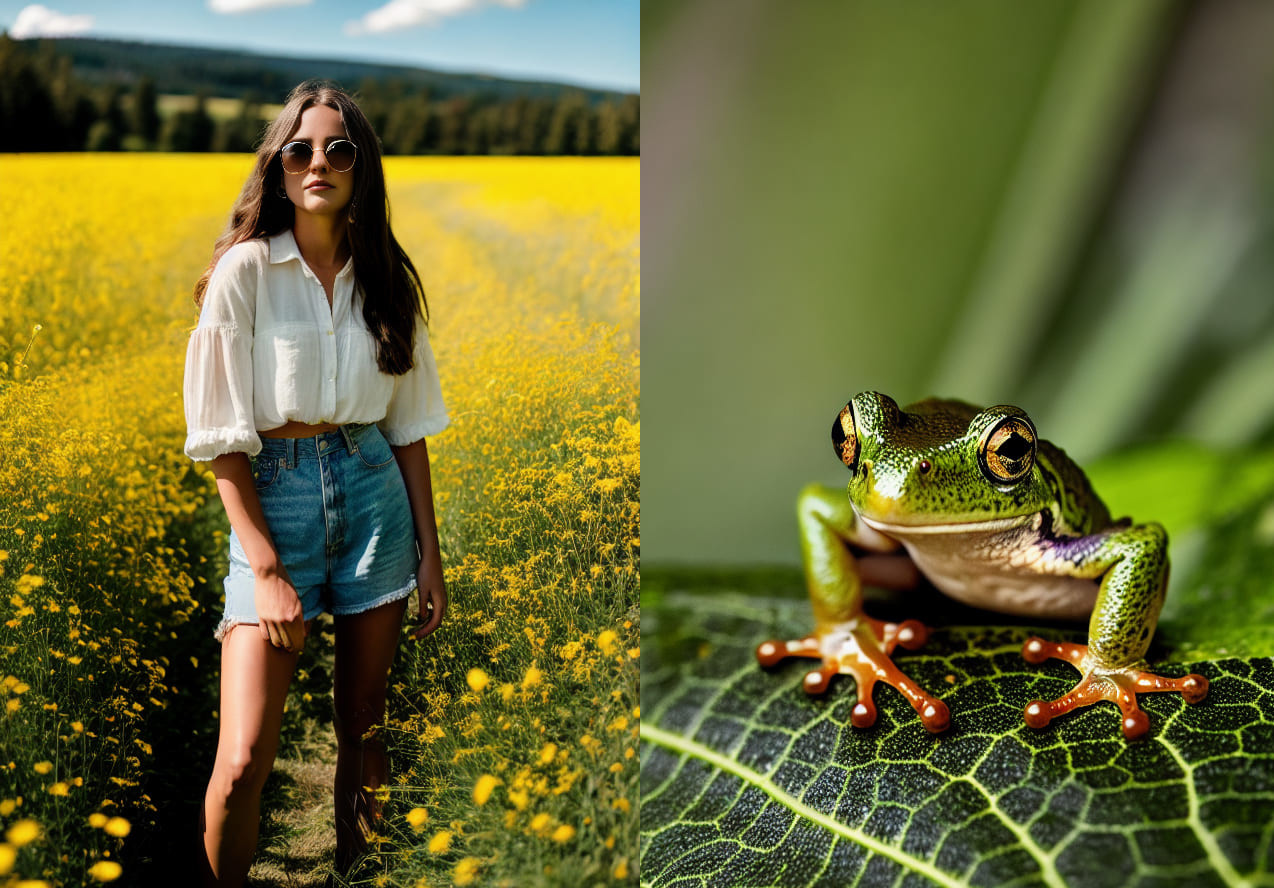

####**Model number 2:** stable-diffusion-2

This stable-diffusion-2 model is resumed from stable-diffusion-2-base (512-base-ema.ckpt) and trained for 150k steps using a v-objective on the same dataset. Resumed for another 140k steps on 768x768 images (Set to 768x768).

Developed by: Robin Rombach, Patrick Esser

Language: English

License: https://huggingface.co/stabilityai/stable-diffusion-2/blob/main/LICENSE-MODEL

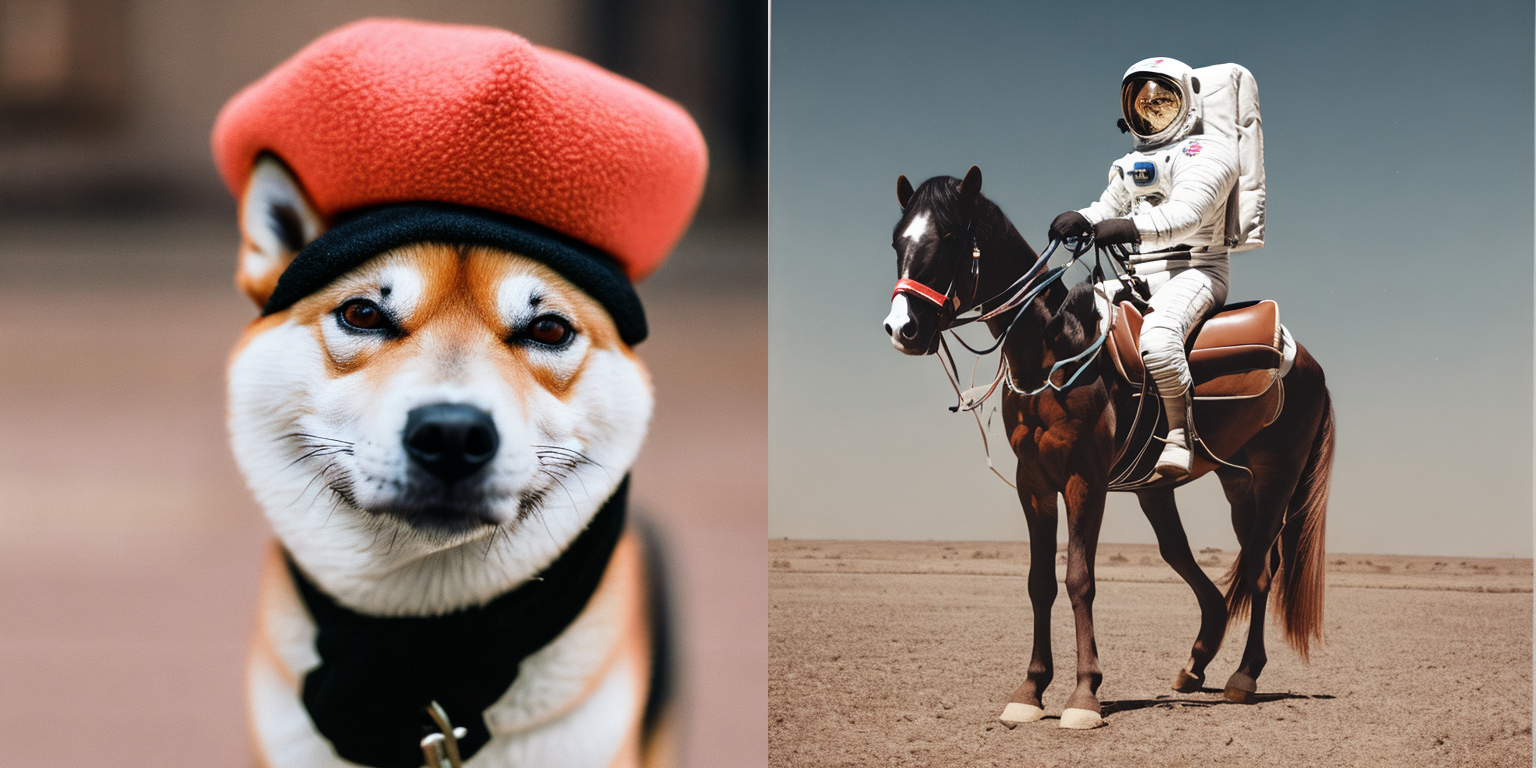

####**Model number 3:** dreamlike-anime-1.0

This model was trained on 768x768px images, so use 768x768px, 704x832px, 832x704px, etc. Higher resolution or non-square aspect ratios may produce artifacts (Set to 832x704px). Makes an anime image

Developed by: https://twitter.com/dreamlike_art

Language: English

License: https://huggingface.co/dreamlike-art/dreamlike-anime-1.0/blob/main/LICENSE.md

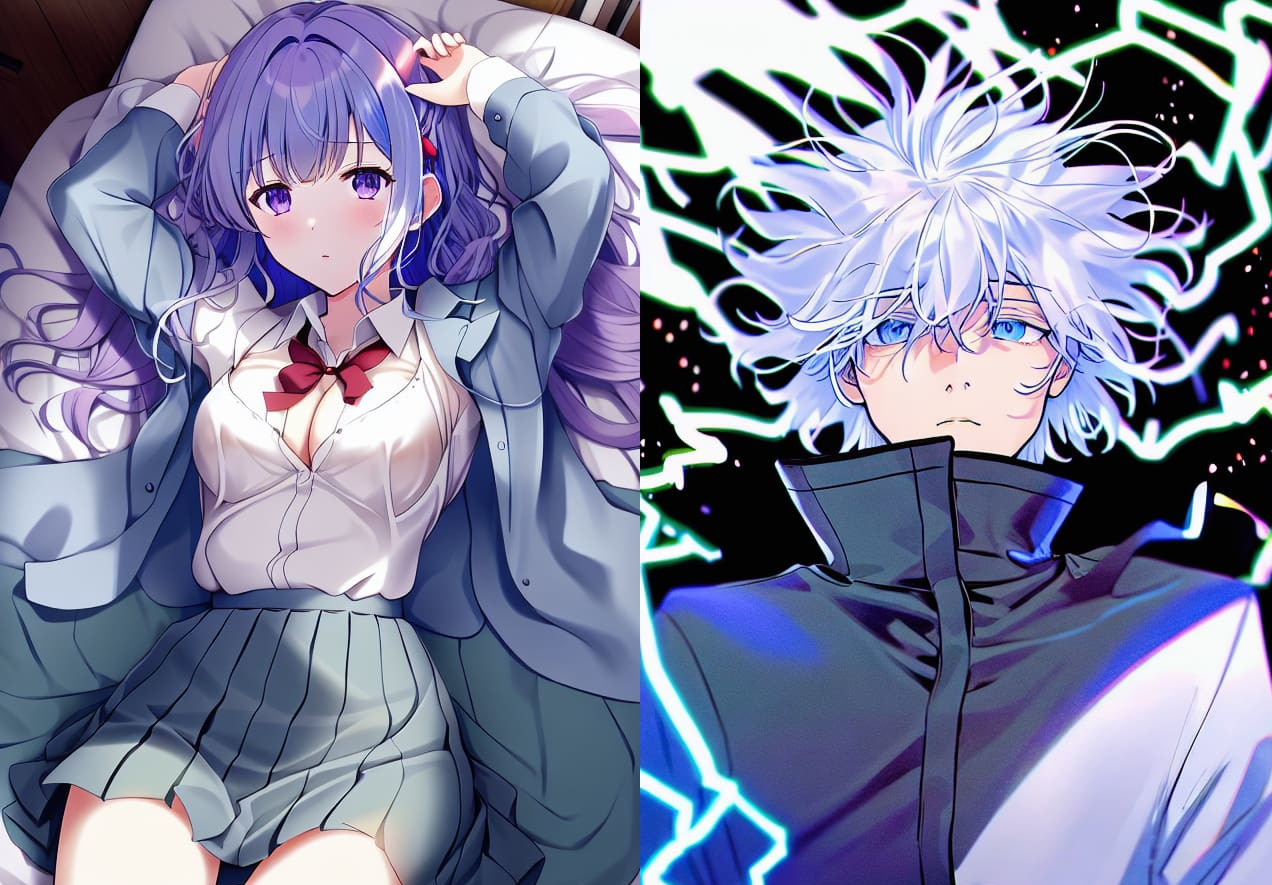

####**Model number 4:** Cyberpunk-Anime-Diffusion

An AI model that generates cyberpunk anime characters!~
Based of a finetuned Waifu Diffusion V1.3 Model with Stable Diffusion V1.5 New Vae, training in Dreambooth

Developed by: DGSpitzer

Language: English

License: https://huggingface.co/DGSpitzer/Cyberpunk-Anime-Diffusion/blob/main/LICENSE


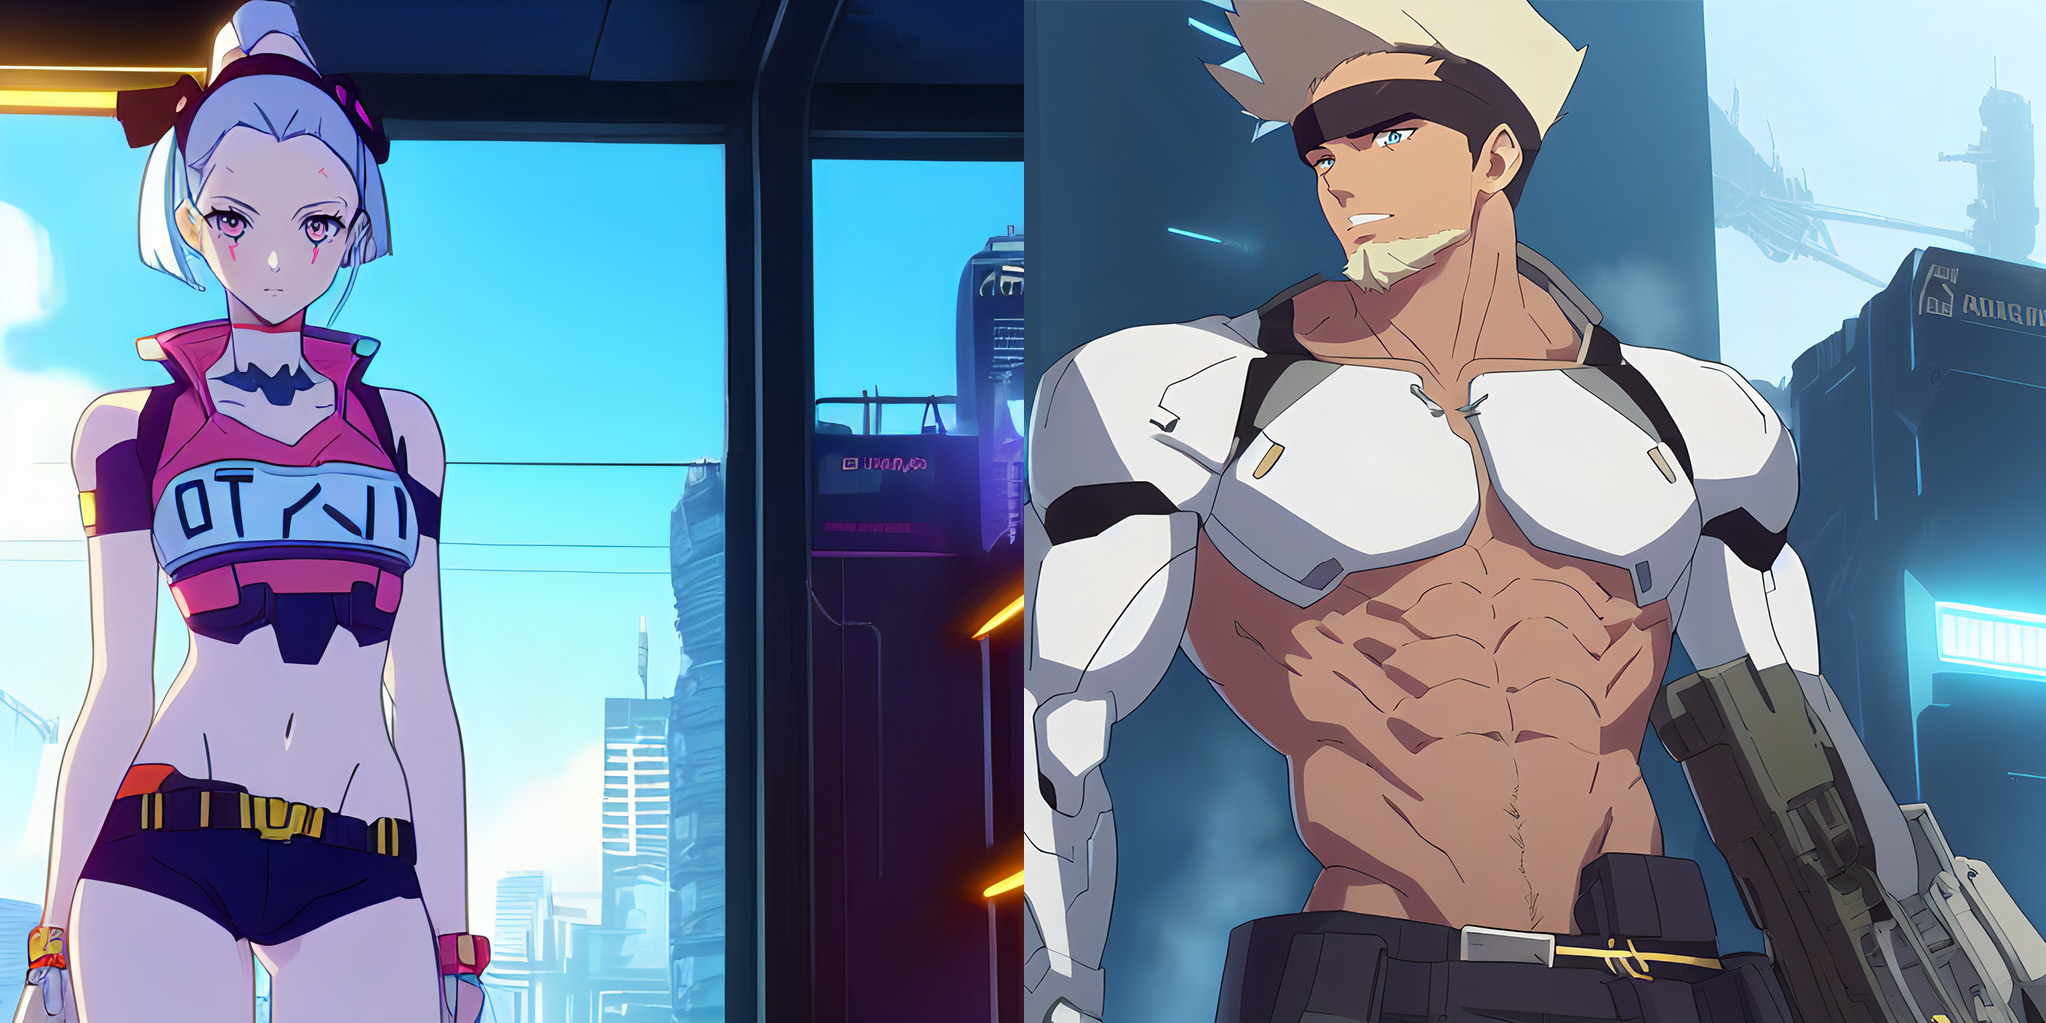

### VID

####**Model number 1:** [2_576w] zeroscope

A watermark-free Modelscope-based video model optimized for producing high-quality 16:9 compositions and a smooth video output. This model was trained from the original weights using 9,923 clips and 29,769 tagged frames at 24 frames, 576x320 resolution.

Developed by: https://huggingface.co/cerspense

Language: English

![[2_576w] zeroscope.gif](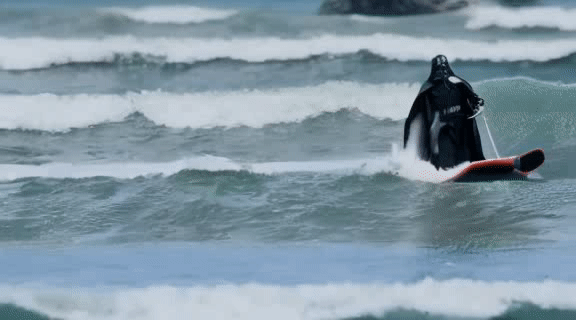)

####**Model number 2:** [1.7b] text-to-video-ms

This model is based on a multi-stage text-to-video generation diffusion model, which inputs a description text and returns a video that matches the text description. Only English input is supported.

Developed by: ModelScope

Language: English

License: https://creativecommons.org/licenses/by-nc-nd/4.0/

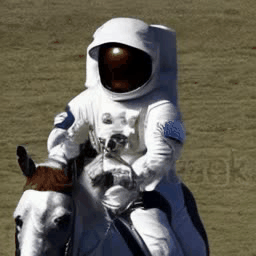

### Image change

 #### instruct-pix2pix


 https://github.com/timothybrooks/instruct-pix2pix

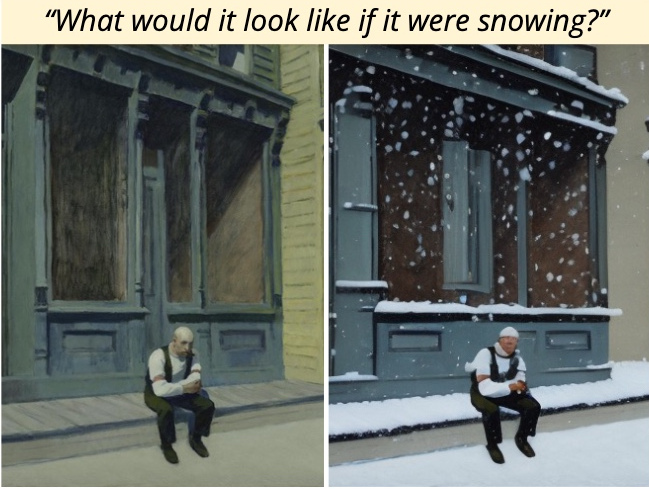

### Voice generation

#### bark

https://huggingface.co/suno/bark

#### ArkanDash/rvc-genshin-impact

https://huggingface.co/ArkanDash/rvc-genshin-impact

# Program

In [ ]:
#@title # Install & Code
from IPython.display import clear_output
install_list =  ["diffusers", "transformers", "accelerate", "scipy", "safetensors", "kora", "bark", "pip", "code"]
install_numbers = 0
install_number = 0
for _ in install_list:
  install_numbers = install_numbers + 1
install_number = install_number + 1
print(f"{install_number}/{install_numbers}")
!pip install diffusers
clear_output()
install_number = install_number + 1
print(f"{install_number}/{install_numbers}")
!pip install transformers
clear_output()
install_number = install_number + 1
print(f"{install_number}/{install_numbers}")
!pip install accelerate
clear_output()
install_number = install_number + 1
print(f"{install_number}/{install_numbers}")
!pip install scipy
clear_output()
install_number = install_number + 1
print(f"{install_number}/{install_numbers}")
!pip install safetensors
clear_output()
install_number = install_number + 1
print(f"{install_number}/{install_numbers}")
!pip install -U kora
clear_output()
install_number = install_number + 1
print(f"{install_number}/{install_numbers}")
!pip install bark
clear_output()
install_number = install_number + 1
print(f"{install_number}/{install_numbers}")
import os
import re
import PIL
import json
import time
import torch
import random
import requests
import IPython
from PIL import Image
from zipfile import ZipFile
from google.colab import files
from IPython.display import HTML
from urllib.request import urlopen
from kora.drive import upload_public
from google.colab.patches import cv2_imshow
from diffusers.utils import export_to_video
from scipy.io.wavfile import write as write_wav
from bark import SAMPLE_RATE, generate_audio, preload_models
from diffusers import DiffusionPipeline, StableDiffusionPipeline, EulerDiscreteScheduler, DPMSolverMultistepScheduler, StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
clear_output()
install_number = install_number + 1
print(f"{install_number}/{install_numbers}")
# IMG_GEN
def zip_packing_img(model, number_of_repetitions, img):
  with ZipFile(f"{model} [{number_of_repetitions}].zip", "a") as myzip:
        myzip.write(img)
        os.remove(img)
  myzip.close()
def _2_0_dreamlike_photoreal(model, number_of_repetitions, prompt, help_with_prompt, image_name):
  model_id = "dreamlike-art/dreamlike-photoreal-2.0"
  pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
  pipe = pipe.to("cuda")
  height = 1024
  width = 768
  image = pipe(prompt, height=height, width=width).images[0]
  image.save(f"{image_name}.jpg")
  img = f"{image_name}.jpg"
  clear_output()
  preview_image = Image.open(img)
  preview_image.show()
  zip_packing_img(model, number_of_repetitions, img)
def _2_0__stable_diffusion(model, number_of_repetitions, prompt, help_with_prompt, image_name):
  model_id = "stabilityai/stable-diffusion-2"
  scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
  pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
  pipe = pipe.to("cuda")
  height = 768
  width = 768
  image = pipe(prompt, height=height, width=width).images[0]
  image.save(f"{image_name}.jpg")
  img = f"{image_name}.jpg"
  clear_output()
  preview_image = Image.open(img)
  preview_image.show()
  zip_packing_img(model, number_of_repetitions, img)
def _1_0_dreamlike_anime(model, number_of_repetitions, prompt, negative_prompt, help_with_prompt, image_name):
  model_id = "dreamlike-art/dreamlike-anime-1.0"
  pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
  pipe = pipe.to("cuda")
  height = 832
  width = 704
  image = pipe(prompt, height=height, width=width, negative_prompt=negative_prompt).images[0]
  image.save(f"{image_name}.jpg")
  img = f"{image_name}.jpg"
  clear_output()
  preview_image = Image.open(img)
  preview_image.show()
  zip_packing_img(model, number_of_repetitions, img)
def _1_3_1_5_Cyberpunk_Anime_Diffusion():
  model_id = "DGSpitzer/Cyberpunk-Anime-Diffusion"
  pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
  pipe = pipe.to("cuda")
  # height = 512
  # width = 512
  image = pipe(prompt).images[0]
  image.save(f"{image_name}.jpg")
  img = f"{image_name}.jpg"
  clear_output()
  preview_image = Image.open(img)
  preview_image.show()
  zip_packing_img(model, number_of_repetitions, img)
clear_output()
# VID_GEN
def zip_packing_vid(model, number_of_repetitions, video_path):
  with ZipFile(f"{model} [{number_of_repetitions}].zip", "a") as myzip:
        myzip.write(video_path)
        os.remove(video_path)
  myzip.close()

def _1_7b_text_to_video_ms(model, number_of_repetitions, prompt, negative_prompt, num_frames, num_inference_steps, help_with_prompt):
  pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
  pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
  pipe.enable_model_cpu_offload()
  video_frames = pipe(prompt, negative_prompt=negative_prompt, num_frames=num_frames, num_inference_steps=num_inference_steps).frames
  video_path = export_to_video(video_frames)
  zip_packing_vid(model, number_of_repetitions, video_path)

def _2_576w_zeroscope(model, number_of_repetitions, prompt, negative_prompt, num_frames, num_inference_steps, help_with_prompt):
  height = 320
  width = 576
  pipe = DiffusionPipeline.from_pretrained("cerspense/zeroscope_v2_576w", torch_dtype=torch.float16)
  pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
  pipe.enable_model_cpu_offload()
  video_frames = pipe(prompt, num_inference_steps=num_inference_steps, height=height, width=width, num_frames=num_frames).frames
  video_path = export_to_video(video_frames)
  zip_packing_vid(model, number_of_repetitions, video_path)
#Image Change
def instruct_pix2pix(model, number_of_repetitions, prompt, image_guidance_scale, num_inference_steps, help_with_prompt, image, image_name):
  model_id = "timbrooks/instruct-pix2pix"
  pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
  pipe.to("cuda")
  pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
  image = PIL.Image.open(image)
  image = PIL.ImageOps.exif_transpose(image)
  image = image.convert("RGB")
  images = pipe(prompt, image=image, num_inference_steps=num_inference_steps, image_guidance_scale=image_guidance_scale).images
  images[0].save(f"{image_name}.jpg")
  img = f"{image_name}.jpg"
  clear_output()
  preview_image = Image.open(img)
  preview_image.show()
  zip_packing_img(model, number_of_repetitions, img)
#VG
clear_output()

## Image generation

In [ ]:
#@title ### [2.0] dreamlike-photoreal
model = "[2.0] dreamlike-photoreal"
number_of_repetitions = 5 #@param {type:"integer"}
prompt = "" #@param {type:"string"}
help_with_prompt = True #@param {type:"boolean"}
image_name = 0
if help_with_prompt == True:
  prompt = f"photo realism, photo,high quality, bright cinematic lighting, gopro, one person, {prompt}"
elif help_with_prompt == False:
  pass
for _ in range(number_of_repetitions):
  image_name = image_name + 1
  print(f"Model:{model}\nNumber_of_repetitions:{image_name}/{number_of_repetitions}\nPrompt:{prompt}\nHelp_with_prompt:{help_with_prompt}")
  _2_0_dreamlike_photoreal(model, number_of_repetitions, prompt, help_with_prompt, image_name)
files.download(f"{model} [{number_of_repetitions}].zip")

In [ ]:
#@title ### [2.0] stable-diffusion
model = "[2.0] stable-diffusion"
number_of_repetitions = 5 #@param {type:"integer"}
prompt = "" #@param {type:"string"}
help_with_prompt = True #@param {type:"boolean"}
image_name = 0
if help_with_prompt == True:
  prompt = f"high quality, {prompt}"
elif help_with_prompt == False:
  pass
for _ in range(number_of_repetitions):
  image_name = image_name + 1
  print(f"Model:{model}\nNumber_of_repetitions:{image_name}/{number_of_repetitions}\nPrompt:{prompt}\nHelp_with_prompt:{help_with_prompt}")
  _2_0__stable_diffusion(model, number_of_repetitions, prompt, help_with_prompt, image_name)
files.download(f"{model} [{number_of_repetitions}].zip")

In [ ]:
#@title ### [1.0] dreamlike-anime
model = "[1.0] dreamlike-anime"
number_of_repetitions = 5 #@param {type:"integer"}
prompt = "" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
help_with_prompt = True #@param {type:"boolean"}
image_name = 0
if help_with_prompt == True:
  prompt = f"photo anime, masterpiece, high quality, absurdres,  {prompt}"
  negative_prompt = f"simple background, duplicate, retro style, low quality, lowest quality, 1980s, 1990s, 2000s, 2005 2006 2007 2008 2009 2010 2011 2012 2013, bad anatomy, bad proportions, extra digits, lowres, username, artist name, error, duplicate, watermark, signature, text, extra digit, fewer digits, worst quality, jpeg artifacts, blurry, {negative_prompt}"
elif help_with_prompt == False:
  pass
for _ in range(number_of_repetitions):
  image_name = image_name + 1
  print(f"Model:{model}\nNumber_of_repetitions:{image_name}/{number_of_repetitions}\nPrompt:{prompt}\nNegative_prompt:{negative_prompt}\nHelp_with_prompt:{help_with_prompt}")
  _1_0_dreamlike_anime(model, number_of_repetitions, prompt, negative_prompt, help_with_prompt, image_name)
files.download(f"{model} [{number_of_repetitions}].zip")

In [ ]:
#@title ### [1.3-1.5] Cyberpunk-Anime-Diffusion
model = "[1.3-1.5] Cyberpunk-Anime-Diffusion"
number_of_repetitions = 5 #@param {type:"integer"}
prompt = "" #@param {type:"string"}
help_with_prompt = True #@param {type:"boolean"}
image_name = 0
if help_with_prompt == True:
  prompt = f"portrait of in dgs illustration style, Anime, cyberpunk city, , ((perfect femine face)), intricate, 8k, highly detailed, shy, digital painting, intense, sharp focus, full-length, {prompt}"
elif help_with_prompt == False:
  pass
for _ in range(number_of_repetitions):
  image_name = image_name + 1
  print(f"Model:{model}\nNumber_of_repetitions:{image_name}/{number_of_repetitions}\nPrompt:{prompt}\nHelp_with_prompt:{help_with_prompt}")
  _1_3_1_5_Cyberpunk_Anime_Diffusion(model, number_of_repetitions, prompt, help_with_prompt, image_name)
files.download(f"{model} [{number_of_repetitions}].zip")

## Video generation

In [ ]:
#@title ## [1.7b] text-to-video-ms
model = "[1.7b] text-to-video-ms"
number_of_repetitions = 1 #@param {type:"integer"}
prompt = "girl" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
num_frames = 2 #@param {type:"slider", min:1, max:64, step:1}
num_inference_steps = 34 #@param {type:"slider", min:1, max:999, step:1}
help_with_prompt = True #@param {type:"boolean"}
video_name = 0
if help_with_prompt == True:
  prompt = f"high quality, {prompt}"
  negative_prompt = f"text, watermark, copyright, blurry, low resolution, blur, low quality, {negative_prompt}"
elif help_with_prompt == False:
  pass
for _ in range(number_of_repetitions):
  clear_output()
  video_name = video_name + 1
  print(f"Model:{model}\nNumber_of_repetitions:{video_name}/{number_of_repetitions}\nPrompt:{prompt}\nNegative_prompt:{negative_prompt}\nNum_frames:{num_frames}\nNum_inference_steps:{num_inference_steps}\nHelp_with_prompt:{help_with_prompt}")
  _1_7b_text_to_video_ms(model, number_of_repetitions, prompt, negative_prompt, num_frames, num_inference_steps, help_with_prompt)
files.download(f"{model} [{number_of_repetitions}].zip")

In [ ]:
#@title ## [2_576w] zeroscope
model = "[2_576w] zeroscope"
number_of_repetitions = 1 #@param {type:"integer"}
prompt = "" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
num_frames = 12 #@param {type:"slider", min:1, max:64, step:1}
num_inference_steps = 72 #@param {type:"slider", min:1, max:999, step:1}
help_with_prompt = True #@param {type:"boolean"}
video_name = 0
if help_with_prompt == True:
  prompt = f"high quality, {prompt}"
  negative_prompt = f"text, watermark, copyright, blurry, low resolution, blur, low quality, {negative_prompt}"
elif help_with_prompt == False:
  pass
for _ in range(number_of_repetitions):
  clear_output()
  video_name = video_name + 1
    print(f"Model:{model}\nNumber_of_repetitions:{video_name}/{number_of_repetitions}\nPrompt:{prompt}\nNegative_prompt:{negative_prompt}\nNum_frames:{num_frames}\nNum_inference_steps:{num_inference_steps}\nHelp_with_prompt:{help_with_prompt}")
  _2_576w_zeroscope(model, number_of_repetitions, prompt, negative_prompt, num_frames, num_inference_steps, help_with_prompt)
files.download(f"{model} [{number_of_repetitions}].zip")

## Image change

In [ ]:
#@title ## Instruct-pix2pix
model = "instruct-pix2pix"
number_of_repetitions = 1 #@param {type:"integer"}
prompt = "" #@param {type:"string"}
image_guidance_scale = 1 #@param {type:"slider", min:1, max:100, step:1}
num_inference_steps = 21 #@param {type:"slider", min:1, max:200, step:10}
help_with_prompt = True #@param {type:"boolean"}
print("Upload your image.")
uploaded = files.upload()
for fn in uploaded.keys():
  image = '{name}'.format(name=fn, length=len(uploaded[fn]))
  clear_output()
if help_with_prompt == True:
  prompt = f"high quality, {prompt}"
elif help_with_prompt == False:
  pass
image_name = 0
for _ in range(number_of_repetitions):
  image_name = image_name + 1
  print(f"Model:{model}\nNumber_of_repetitions:{number_of_repetitions}\nPrompt:{prompt}\nImage_guidance_scale:{image_guidance_scale}\nNum_inference_steps:{num_inference_steps}\nHelp_with_prompt:{help_with_prompt}")
  instruct_pix2pix(model, number_of_repetitions, prompt, image_guidance_scale, num_inference_steps, help_with_prompt, image, image_name)
os.remove(image)
files.download(f"{model} [{number_of_repetitions}].zip")

## Voice generation

In [ ]:
#@title ## bark
text = "Hello, my name is Suno. And, uh \u2014 and I like pizza [laughs]. Yeah." #@param {type:"string"}
preload_models()
audio_array = generate_audio(text)
clear_output()
IPython.display.Audio(audio_array, rate=SAMPLE_RATE)

In [ ]:
#@title ## ArkanDash/rvc-genshin-impact
#@markdown Running on public URL
%cd /content/
!python -m pip install -U pip wheel
clear_output()
!apt-get update
clear_output()
!apt-get install -qq -y aria2
clear_output()
!git clone -b master https://github.com/ArkanDash/Multi-Model-RVC-Inference
clear_output()
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/lj1995/VoiceConversionWebUI/resolve/main/hubert_base.pt -d /content/Multi-Model-RVC-Inference -o hubert_base.pt
clear_output()
!pip install -r /content/Multi-Model-RVC-Inference/requirements.txt
clear_output()
%cd /content/
!git clone -b gcolab https://huggingface.co/ArkanDash/rvc-genshin-impact
clear_output()
!rm -rf /content/Multi-Model-RVC-Inference/weights
clear_output()
!cp -r /content/rvc-genshin-impact/weights /content/Multi-Model-RVC-Inference/
clear_output()
!rm -rf /content/rvc-genshin-impact/
%cd /content/Multi-Model-RVC-Inference
clear_output()
!python app.py --colab

# Other

**My github repository:** https://github.com/DonteBoy/Ai_GEN

**Updated:** 10.7.2023